# Imbalanced Dataset
   
   a dataset with uneven distribution of class is known as imbalanced dataset

# Techniques to handle imbalanced dataset
                            1] Downsampling the data
                            2] Oversampling the data

# Scenario where we can face problem of imbalanced dataset
                       
                       1] Cancer prediction
                       2] E-mail Fraud
                       3] Credit Card Fraud
                       4] Diabetes prediction

# Importing Libraries

In [12]:
#Basic libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# library used for over sampling the data
from imblearn.over_sampling import RandomOverSampler      

# Reading the data
              
              for oversampling we are going to use a credict card fraud detection dataset 
              from kaggle this dataset has 30 independent features and one "Class" feature
              as a dependent feature

In [2]:
credict_card = pd.read_csv('creditcard.csv')
credict_card.head()
print('total rows = ',credict_card.shape[0] , 'total features = ',credict_card.shape[1])

total rows =  284807 total features =  31


# Visualize the distribution of class feature to check if dataset is balanced or        not

0    284315
1       492
Name: Class, dtype: int64


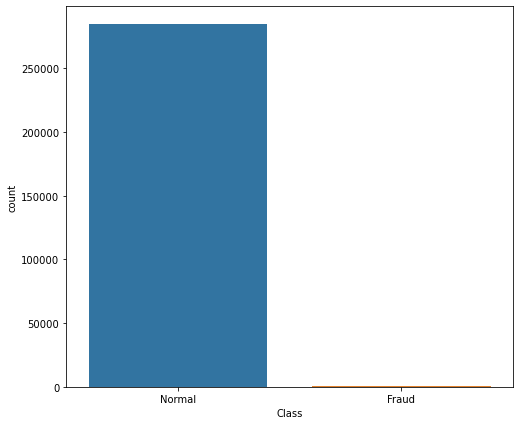

In [3]:
plt.figure(figsize=(8,7))
value_count = credict_card['Class'].value_counts()
sns.countplot(credict_card['Class'])
plt.xticks(np.arange(2),labels=['Normal','Fraud'])
print(value_count)
plt.show()

# As we can see our data is heavely imbalanced with 284315 Normal cases and    492 as Fraud cases

# we will perform the oversampling using imblearn library in    python

In [5]:
# Dimensions before Over Sampling

Normal = credict_card[credict_card['Class'] == 0]
Fraud = credict_card[credict_card['Class'] == 1]
print('Normal Data Dimensions = ',Normal.shape)
print('Fraud Data Dimensions = ',Fraud.shape)

Normal Data Dimensions =  (284315, 31)
Fraud Data Dimensions =  (492, 31)


In [6]:
# seperating dependent and independent features 

x = credict_card.drop('Class',axis = 1)
y = credict_card['Class']

In [11]:
# using RandomOverSampler from imblearn and checking for count of values after oversampling

ros = RandomOverSampler(random_state=1)
x_res , y_res = ros.fit_sample(x,y)

In [13]:
print('initial count of y was {}'.format(Counter(y)))
print('final count of y after oversampling is {}'.format(Counter(y_res)))

initial count of y was Counter({0: 284315, 1: 492})
final count of y after oversampling is Counter({0: 284315, 1: 284315})


1    284315
0    284315
Name: Class, dtype: int64


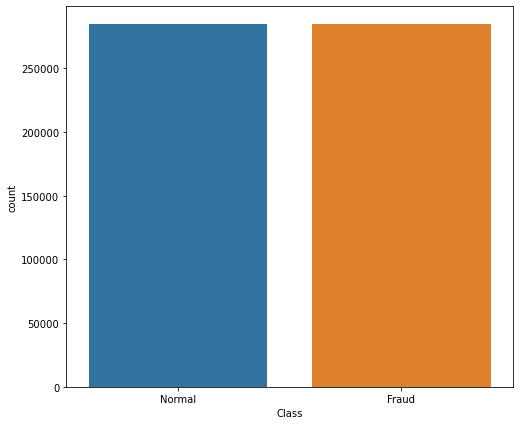

In [17]:
# visualize data after oversampling
print(y_res.value_counts())
plt.figure(figsize=(8,7))
sns.countplot(y_res)
plt.xticks(np.arange(2),labels=['Normal','Fraud'])
plt.show()